In [2]:
# Importing the nesscary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime
import math as ma

In [4]:
# Readind the excel file
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df = pd.read_excel(xls,'CustomerDemographic')

In [5]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [7]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [12]:
# Checking null or nan values in the dataset
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [17]:
# Checking unique value in each column of the dataset
for col in df:
    print(df[col].nunique())

4000
3139
3725
6
100
3448
195
9
3
2
90
2
22


In [36]:
# Anaylzing gender against the bike bought
# The values in gender columns are [Female,Male,U,Femal,F,M]
# we will define a gender array first
gender = [0,0,0] #(0 index is for female,1 is for Male, 2 is for U or Unknown)
for each in df['gender']:
    if (each=='Female') or (each=='F') or (each=='Femal'):
        gender[0] += 1
    elif (each=='Male') or (each=='M'):
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

# Now check the total number of bike bought on the basis of gender
bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum() + df['past_3_years_bike_related_purchases'][df['gender']=='Femal'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

print(bike)

# We will make another list that will be useful for visualization of the results
graph0 = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
print(graph0)

[2039, 1873, 88]
[98359, 93483, 3718]
[2039, 98359, 1873, 93483, 88, 3718]


([<matplotlib.axis.XTick at 0x28c154c9190>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

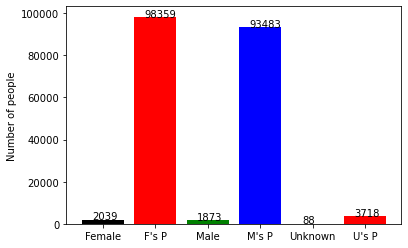

In [41]:
# Now we will visualize the result in matplotlib
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)
formatter = FuncFormatter(gf)
colorr = (0.3,0.1,0.4,0.6)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graph0, color=['black', 'red', 'green', 'blue'])
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graph0[i]+0.1, s = graph0[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))


([<matplotlib.axis.XTick at 0x28c1553ad30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

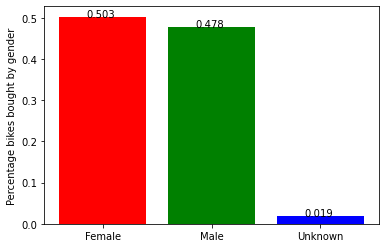

In [42]:
# Now we will plot thi information in terms of averge per gender
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = ['red','green','blue'])
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [45]:
# Now first we will create the age column and add it into our dataset
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['age'] = df['DOB'].apply(lambda x: from_dob_to_age(x))

In [51]:
df['age'] = df['age'].fillna(0).astype(int)

In [52]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,67
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,45
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,19
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,47


In [67]:
#  we want to analyize age vs bike bought so we have an clear idea about the demographic group
# for that we will find the mean and standered deviation of the age column on the basis of gender

age_group_gender = [0,0,0]
j = 0
total_sum = 0
stdv = []

for each in df['gender']:
    if each[0] == 'F' and df['age'][j] != 0:
        age_group_gender[0] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    elif each[0] == 'M' and df['age'][j] != 0:
        age_group_gender[1] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    elif df['age'][j] != 0:
        age_group_gender[2] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    j+=1

print(total_sum)
print(age_group_gender)
#print(stand_deviation)
# Calculate the mean age
mean_age = round(total_sum/sum(age_group_gender),0)
print(mean_age)
stdv_val = round(ma.sqrt(1/(sum(age_group_gender)-1)*sum((stdv - (total_sum/sum(age_group_gender)))**2)),0)
print(stdv_val)

169330
[2039, 1873, 1]
43.0
13.0


In [68]:
df['age'].describe()

count    4000.000000
mean       42.332500
std        14.147968
min         0.000000
25%        33.000000
50%        43.000000
75%        52.000000
max       177.000000
Name: age, dtype: float64

In [70]:
#pruchases from age 43 - 13/2, 43, 43 + 13/2 
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = mean_age - stdv_val/2
sq = mean_age
tq = mean_age + stdv_val/2
print(fq, sq, tq)
jjj = 0
for each in df['gender']:
    temp = int(df['age'][jjj])
    bkt  = int(df['past_3_years_bike_related_purchases'][jjj])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    jjj += 1
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

36.5 43.0 49.5


In [71]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

624 394 395 626
597 388 312 576


([<matplotlib.axis.XTick at 0x28c12705400>,
 [Text(0, 0, 'Fq1'),
  Text(1, 0, 'Mq1'),
  Text(2, 0, 'Fq2'),
  Text(3, 0, 'Mq2'),
  Text(4, 0, 'Fq3'),
  Text(5, 0, 'Mq3'),
  Text(6, 0, 'Fq4'),
  Text(7, 0, 'Mq4')])

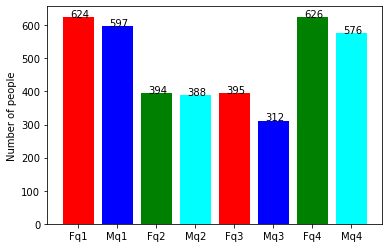

In [72]:
graphgen = [len(dtt["Female1"]), len(dtt["Male1"]), len(dtt["Female2"]), len(dtt["Male2"]), len(dtt["Female3"]), len(dtt["Male3"]), len(dtt["Female4"]), len(dtt["Male4"])]
x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = ['red','blue','green','cyan'])
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [73]:
df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

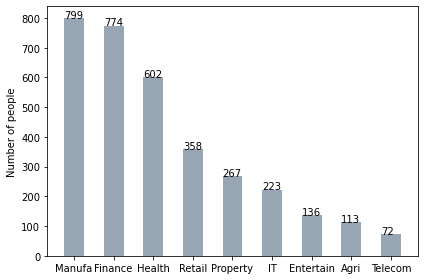

In [77]:
# We will visvualize this information for a better understanding
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.5)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manufa", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))
plt.tight_layout()

In [78]:
df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [82]:
#split into 3: M (Mass), H(High), A(Affluent)
jjj = 0
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}

for each in df['wealth_segment']:
    temp = int(df['age'][jjj])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    jjj += 1
print(len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print(len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print(len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

606 405 339 604
303 206 178 309
312 171 480 0


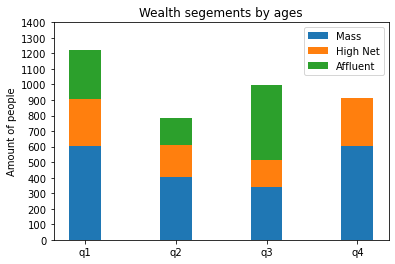

In [83]:
N = 4
wsmtp = [len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"])]
wshtp = [len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"])]
wsatp = [len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"])]

bars = np.add(wsmtp, wshtp).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wsmtp, width)
p2 = plt.bar(ind, wshtp, width,  bottom=wsmtp)
p3 = plt.bar(ind, wsatp, width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by ages')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

In [84]:
df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64